In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np

def plot_2_lines(x1, x2, title):
    ax1 = x1.plot(figsize = (17, 7), color = '#ff7f0e', title = title)

    ax2 = ax1.twinx()
    ax2.spines['right'].set_position(('axes', 1.0))
    x2.plot(ax=ax2, color = '#1f77b4')
    
    
d = pd.read_pickle("data/imbalance.pkl")

# Imbalance summation by different timeframes vs price

# DAY

In [3]:
iday = d[['ts', 'imb']].copy()
iday["day"] = iday.ts.dt.floor('d')

# Sum imbalance by day
sumi = pd.DataFrame(iday.groupby(['day'])['imb'].agg('sum'))
sumi.reset_index(level=0, inplace=True)
sumi.head()

,day,imb
0,2018-04-17,544.339
1,2018-04-18,143.030
2,2018-04-19,-428.747
3,2018-04-20,123.329
4,2018-04-21,518.394


In [6]:
c = pd.read_csv("data/Binance_BTCUSDT_d.csv", skiprows = 1)[['date', 'open', 'close']]
c["day"] = pd.to_datetime(c.date, infer_datetime_format=True)
c = c[['open', 'close', 'day']]
c

,open,close,day
0,38386.89,38308.13,2022-02-21
1,40079.17,38386.89,2022-02-20
2,39974.45,40079.17,2022-02-19
3,40515.71,39974.44,2022-02-18
4,43873.56,40515.70,2022-02-17
...,...,...,...
1646,4086.29,4016.00,2017-08-21
1647,4139.98,4086.29,2017-08-20
1648,4108.37,4139.98,2017-08-19
1649,4285.08,4108.37,2017-08-18


#### Joined dataset

In [7]:
join = sumi.join(c.set_index('day'), on='day')
join["change"] = (join.close - join.open) / join.open
join
# Only 80 rows

,day,imb,open,close,change
0,2018-04-17,544.339,8064.92,7885.02,-0.022306
1,2018-04-18,143.030,7890.96,8173.00,0.035742
2,2018-04-19,-428.747,8173.99,8278.00,0.012725
3,2018-04-20,123.329,8273.84,8856.98,0.070480
4,2018-04-21,518.394,8852.12,8915.31,0.007138
...,...,...,...,...,...
75,2018-07-01,-216.714,6391.08,6356.81,-0.005362
76,2018-07-02,-456.504,6360.82,6615.29,0.040006
77,2018-07-03,-160.834,6615.29,6513.86,-0.015333
78,2018-07-04,369.475,6511.01,6586.98,0.011668


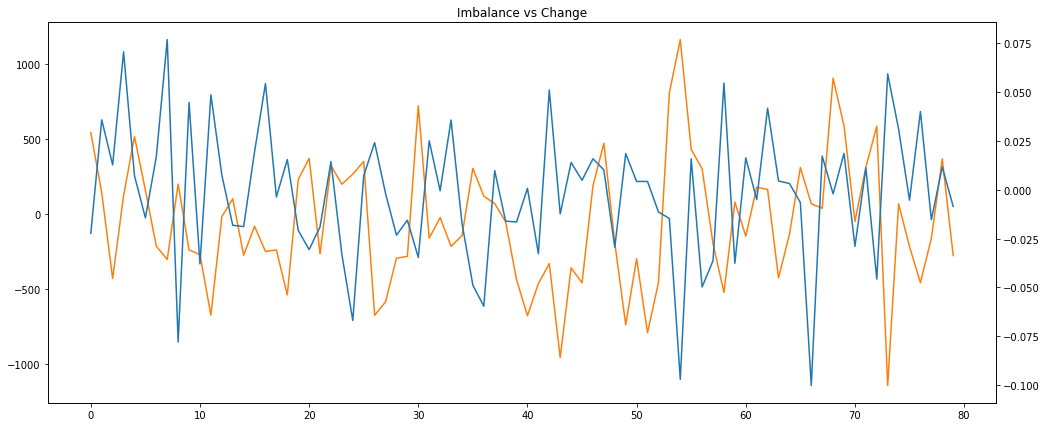

In [9]:
plot_2_lines(join.imb, join.change, "Imbalance vs Change")

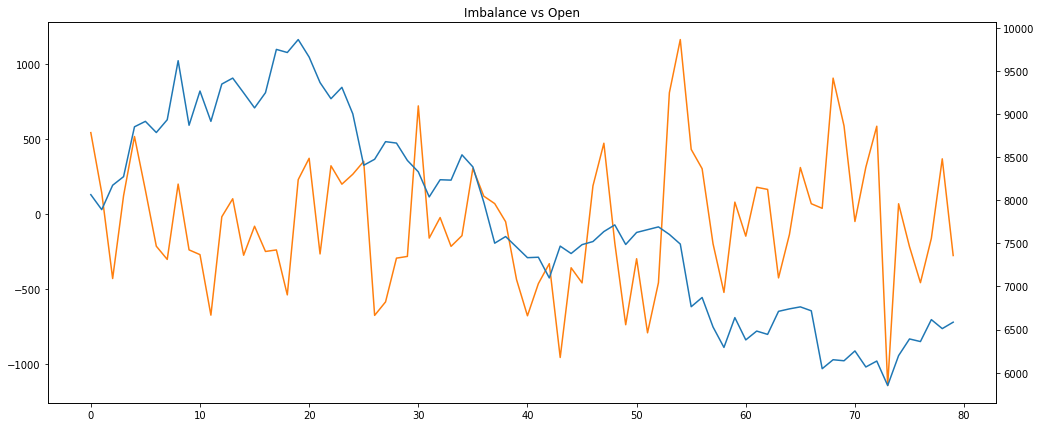

In [10]:
plot_2_lines(join.imb, join.open, "Imbalance vs Open")

### Correlations

#### Shifted change

In [10]:
join["schange"] = join.change.shift()
join = join.iloc[1:, :]
join = join.reset_index(drop = True)

In [11]:
join.imb.corr(join.schange, method = "pearson")

-0.021236716001371628

In [12]:
join.imb.corr(join.schange, method = "kendall")

-0.0042194092827004225

In [13]:
join.imb.corr(join.schange, method = "spearman")

-0.011903602726387538

### Labeling

In [29]:
e = join.copy()
e["schange"] = e.change.shift(-1)
e = e.iloc[1:, :]
e = e.reset_index( drop = True)
e['updown'] = np.where(e.schange >= 0 , 'Up', 'Down')
e['absimb'] = np.abs(e.imb)

In [30]:
e.head()

,day,imb,open,close,change,schange,updown,absimb
0,2018-04-18,143.030,7890.96,8173.00,0.035742,0.012725,Up,143.030
1,2018-04-19,-428.747,8173.99,8278.00,0.012725,0.070480,Up,428.747
2,2018-04-20,123.329,8273.84,8856.98,0.070480,0.007138,Up,123.329
3,2018-04-21,518.394,8852.12,8915.31,0.007138,-0.014390,Down,518.394
4,2018-04-22,160.048,8915.31,8787.02,-0.014390,0.016881,Up,160.048


<AxesSubplot:xlabel='imb', ylabel='schange'>

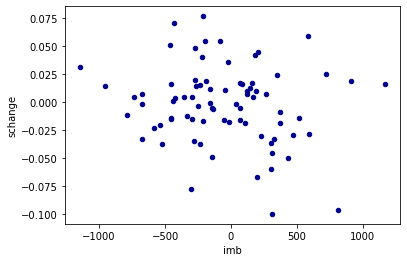

In [23]:
e.plot.scatter(x='imb', y='schange', c='DarkBlue')

<AxesSubplot:xlabel='updown', ylabel='imb'>

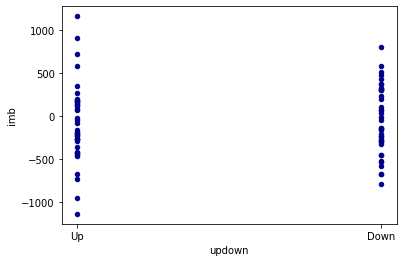

In [28]:
e.plot.scatter(x='updown', y='imb', c='DarkBlue')

<AxesSubplot:xlabel='updown', ylabel='absimb'>

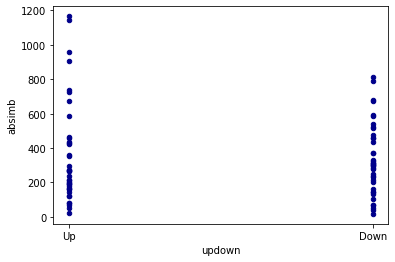

In [31]:
e.plot.scatter(x='updown', y='absimb', c='DarkBlue')

# MINUTE

In [62]:
imin = d[['ts', 'imb']].copy()
imin["date"] = imin.ts.dt.floor('min')
# Sum imbalance by minute
sumi = pd.DataFrame(imin.groupby(['date'])['imb'].agg('sum'))
sumi.reset_index(level=0, inplace=True)
sumi.head()

,date,imb
0,2018-04-17 10:56:00,-0.974
1,2018-04-17 10:57:00,9.480
2,2018-04-17 10:58:00,-2.132
3,2018-04-17 10:59:00,-1.444
4,2018-04-17 11:00:00,-5.535


In [63]:
c = pd.read_csv("data/Binance_BTCUSDT_minute.csv", skiprows = 1)[['date', 'open', 'close']]
c["min"] = pd.to_datetime(c['date'])
c.head()

,date,open,close,min
0,2022-02-23 03:06:00,37726.86,37716.62,2022-02-23 03:06:00
1,2022-02-23 03:05:00,37739.97,37726.87,2022-02-23 03:05:00
2,2022-02-23 03:04:00,37719.30,37739.96,2022-02-23 03:04:00
3,2022-02-23 03:03:00,37671.83,37719.31,2022-02-23 03:03:00
4,2022-02-23 03:02:00,37618.56,37671.83,2022-02-23 03:02:00


In [64]:
np.nanmin(imin.date), np.nanmax(imin.date)

(numpy.datetime64('2018-04-17T10:56:00.000000000'),
 numpy.datetime64('2018-07-05T02:24:00.000000000'))

In [58]:
np.nanmin(c.date), np.nanmax(c.date)

('2019-09-08 17:57:00', '2022-02-23 03:06:00')

#### No joined dates, need a larger dataset